In [18]:
from helpers_jpeg import *
from LBT_huffman import *
from helpers import *
import numpy as np
import json

In [24]:
lighthouse = sio.loadmat('mat/SF2_competition_image_2019.mat')
lighthouse2 = sio.loadmat('mat/lighthouse.mat')
flamingo = sio.loadmat('mat/flamingo.mat')
bridge = sio.loadmat('mat/bridge.mat')
X = np.array(lighthouse['X'], dtype=float)
B = np.array(flamingo['X'], dtype=float)
F = np.array(bridge['X'], dtype=float)
G = np.array(lighthouse2['X'], dtype=float)
images = {
    'competition': X, 
    'flamingo': B, 
    'bridge': F,
    'lighthouse': G
}

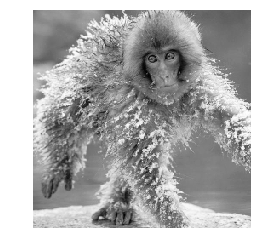

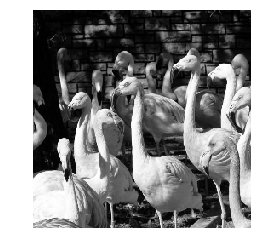

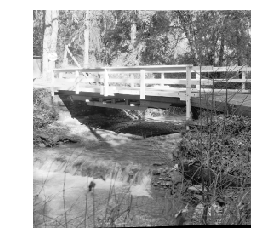

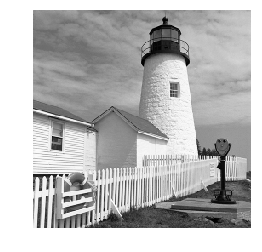

In [37]:
for img in images:
    draw(images[img])

In [7]:
overall = {}

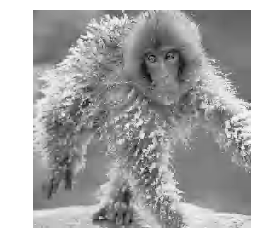

RMS: 12.149246444391782
MS-SSIM: 0.7363601115351831


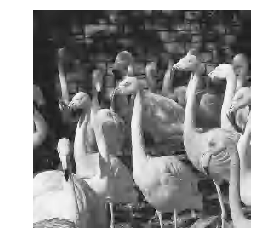

RMS: 12.914921373784763
MS-SSIM: 0.7952077979037199


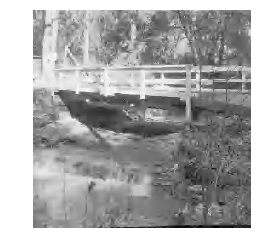

RMS: 13.972873041359037
MS-SSIM: 0.7192090581652414


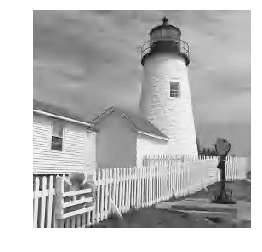

RMS: 9.590911066487532
MS-SSIM: 0.6807303269576026


In [36]:
dwt = DwtHuffmanHelper()
result = sio.loadmat('competition_out/json/dwt4.mat')
for img in images:
    Z = dwt.dwtdec(result[img+'vlc'], result[img+'qstep'], n=4)
    sio.savemat('competition_out/img/dwt.mat', result)
    draw(Z, fname='competition_out/img/dwt_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

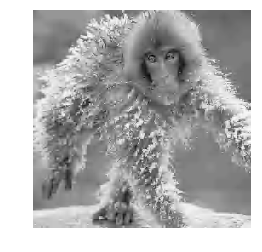

RMS: 11.765467440319897
MS-SSIM: 0.7385600941428531


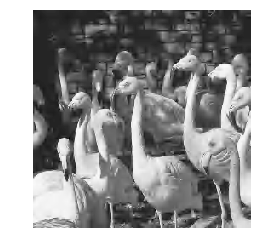

RMS: 11.764393094298706
MS-SSIM: 0.7985145115691623


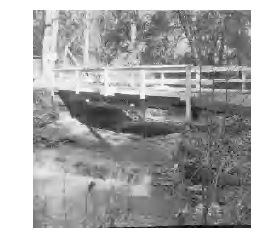

RMS: 13.3320170770453
MS-SSIM: 0.7222535582170198


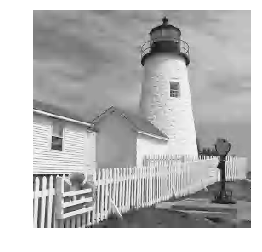

RMS: 9.561578697743382
MS-SSIM: 0.6769397620412027


In [34]:
dwt = DwtHuffmanHelper()
result = sio.loadmat('competition_out/json/dwt3.mat')
for img in images:
    Z = dwt.dwtdec(result[img+'vlc'], result[img+'qstep'], n=3)
    sio.savemat('competition_out/img/dwt.mat', result)
    draw(Z, fname='competition_out/img/dwt_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

In [9]:
sio.savemat('competition_out/json/Group7.mat', overall)

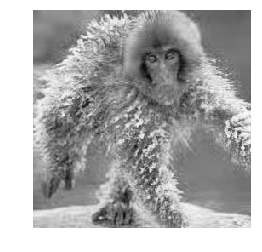

RMS: 10.91601382393138
MS-SSIM: 0.7273200773969831


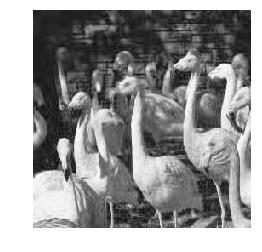

RMS: 11.87606685643721
MS-SSIM: 0.7952914161708328


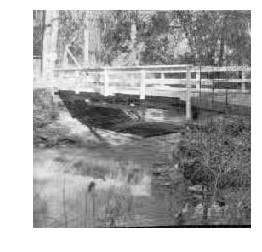

RMS: 12.346702384746859
MS-SSIM: 0.7245681618549986


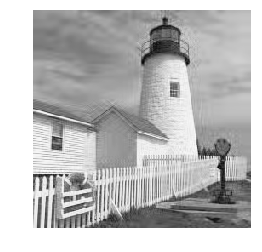

RMS: 8.050367859085155
MS-SSIM: 0.6700144139379302


In [29]:
lbt = LBTHuffman()
result = sio.loadmat('competition_out/json/lbt8x8.mat')
for img in images:
    Z = lbt.lbthuffdec(result[img+'vlc'], result[img+'qstep'], N=16, M=16)
    out = Z - 128 * round(np.min(Z) / 128)
    if img == 'competition':
        overall['X'] = out
    if img == 'bridge':
        overall['X1'] = out
    if img == 'flamingo':
        overall['X2'] = out
    draw(Z, fname='competition_out/img/lbt_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

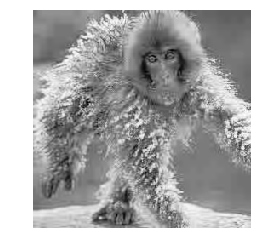

RMS: 10.726768671912899
MS-SSIM: 0.7311933954635235


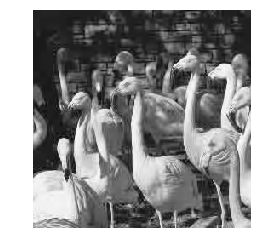

RMS: 10.992538676676537
MS-SSIM: 0.799608712309572


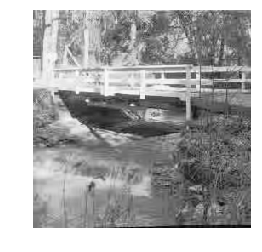

RMS: 12.12384715554182
MS-SSIM: 0.7250710527739831


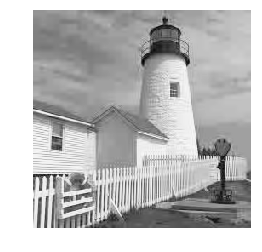

RMS: 7.937481971557115
MS-SSIM: 0.6711210212356444


In [31]:
lbt = LBTHuffman()
result = sio.loadmat('competition_out/json/lbt16x16.mat')
for img in images:
    Z = lbt.lbthuffdec(result[img+'vlc'], result[img+'qstep'], N=8, M=8)
    out = Z - 128 * round(np.min(Z) / 128)
    if img == 'competition':
        overall['X'] = out
    if img == 'bridge':
        overall['X1'] = out
    if img == 'flamingo':
        overall['X2'] = out
    draw(Z, fname='competition_out/img/lbt_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

In [17]:
sio.savemat('competition_out/json/Group7.mat', overall)

Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[34.]]
Inverse 16 x 16 DCT



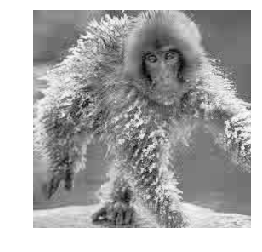

RMS: 11.195404841967974
MS-SSIM: 0.72885746287311
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[39.90625]]
Inverse 16 x 16 DCT



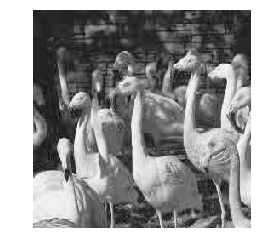

RMS: 12.064913618362256
MS-SSIM: 0.7953614205328053
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[37.125]]
Inverse 16 x 16 DCT



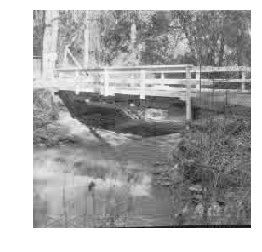

RMS: 12.649009251824255
MS-SSIM: 0.7219253999201777
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[29.375]]
Inverse 16 x 16 DCT



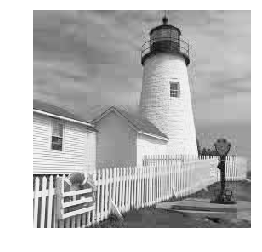

RMS: 8.201710279395588
MS-SSIM: 0.670379415945307


In [26]:
jpg = JpegHuffmanHelper()
result = sio.loadmat('competition_out/json/jpeg16x16.mat')
for img in images:
    Z = jpg.jpegdec(result[img+'vlc'], result[img+'qstep'], N=16, M=16)
    draw(Z, fname='competition_out/img/jpeg_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

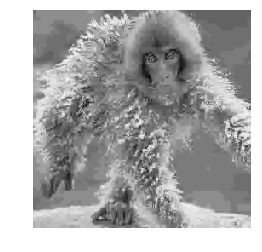

RMS: 12.321543763591134
MS-SSIM: 0.7258038531697866


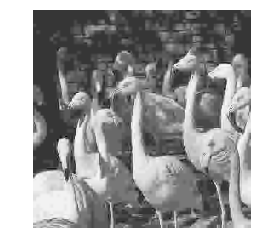

RMS: 14.318936766104231
MS-SSIM: 0.789255831316615


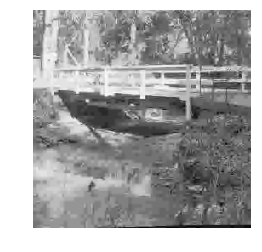

RMS: 13.975458552195853
MS-SSIM: 0.7134772744347025


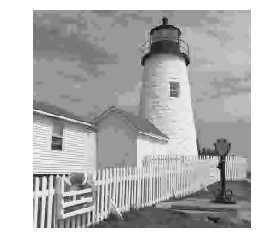

RMS: 10.32255871142445
MS-SSIM: 0.6624828584303363


In [32]:
lbt = LBTHuffman()
result = sio.loadmat('competition_out/json/lbt16x4.mat')
for img in images:
    Z = lbt.lbthuffdec(result[img+'vlc'], result[img+'qstep'], N=4, M=16)
    out = Z - 128 * round(np.min(Z) / 128)
    if img == 'competition':
        overall['X'] = out
    if img == 'bridge':
        overall['X1'] = out
    if img == 'flamingo':
        overall['X2'] = out
    draw(Z, fname='competition_out/img/lbt_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))

Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[35.75]]
Inverse 8 x 8 DCT



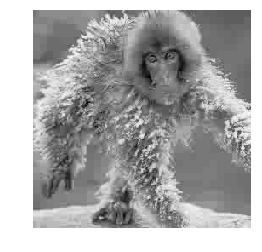

RMS: 11.321441610959113
MS-SSIM: 0.7316739708174905
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[41.5]]
Inverse 8 x 8 DCT



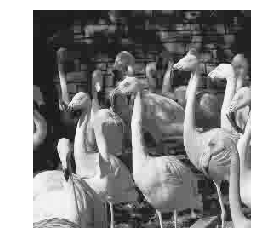

RMS: 11.760770210252197
MS-SSIM: 0.7993137604794192
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[38.6875]]
Inverse 8 x 8 DCT



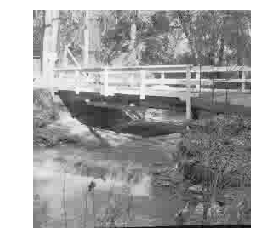

RMS: 12.817574358762316
MS-SSIM: 0.72280154808541
Generating huffcode and ehuf using default tables
Decoding rows
Inverse quantising to step size of [[33.125]]
Inverse 8 x 8 DCT



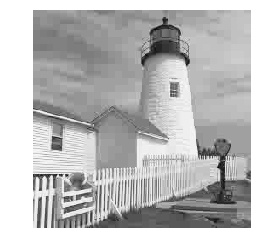

RMS: 8.500621948491828
MS-SSIM: 0.6746337044526397


In [25]:
jpg = JpegHuffmanHelper()
result = sio.loadmat('competition_out/json/jpeg8x8.mat')
for img in images:
    Z = jpg.jpegdec(result[img+'vlc'], result[img+'qstep'], N=8, M=8)
    draw(Z, fname='competition_out/img/jpeg_{}'.format(img))
    print('RMS: {}\nMS-SSIM: {}'.format(np.std(images[img]-Z), quality(images[img], Z)))